In [60]:
from tensorflow.keras.datasets import imdb
#only keeping the top 10,000 most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

In [61]:
#Decode back to english
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decodedreview = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [84]:
#Pad lists so they all have the same length with shape(samples, maxlength).
#Start model with layer capable of handling this tensor
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    print(sequences)
    for i, sequence in enumerate(sequences):
        #print("I is: ",i)
        #print(sequence)
        for j in sequence:
            #print("J is: ", j)
            #makes specific indicies 1
            results[i, j] = 1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

In [85]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
#remember relu activation does this --> output = relu(dot(input, W) + b)
#having 16 units means weight matrix has shape (input_dimension, 16)
#relu zeros out negative values
model = keras.Sequential([layers.Dense(16, activation = "relu"),
                         layers.Dense(16, activation = "relu"),
                         layers.Dense(1, activation = "sigmoid")])

In [65]:
#Crossentropy measures the distance between probablity distributions i.e. gt and pred
model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [66]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [67]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
118/118 [==============================] - 3s 18ms/step - loss: 0.6932 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/20
118/118 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 4/20
118/118 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 5/20
118/118 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/20
118/118 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/20
118/118 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch

In [68]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

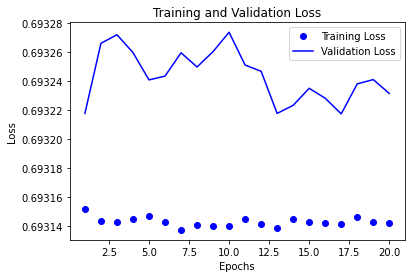

In [69]:
#plot training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

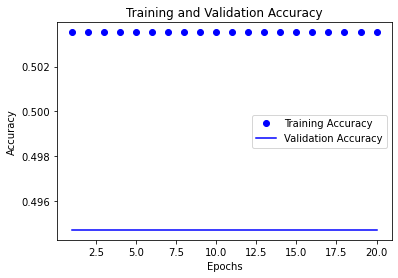

In [70]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [71]:
#Create new model and train for 4 epochs
#model = keras.Sequential([
#    layers.Dense(16, activation="relu"),
#    layers.Dense(16, activation="relu"),
#    layers.Dense(1, activation="sigmoid")
#])
#model.compile(optimizer="rmsprop",
#              loss="binary_crossentropy",
#              metrics=["accuracy"])
#model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5000


In [72]:
#testloss, test accuracy
results

[0.6931586861610413, 0.5]

In [74]:
#model.predict(x_test)

### Multiclass Classification - Reuters Topics

In [75]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [79]:
print(len(train_data))
print(len(test_data))
#train_data[1]

8982
2246


In [80]:
#Data Prep
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [88]:
train_labels
#train_labels.shape

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [90]:
#one hot encode the label information
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [89]:
#One hot encode the label information -- 46 is the number of output classes
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
        return results
#y_train = to_one_hot(train_labels)
#y_test = to_one_hot(test_labels)

In [92]:
#softmax = probability distribution for the 46 classes
model = keras.Sequential([layers.Dense(64, activation = "relu"),
                         layers.Dense(64, activation = "relu"),
                         layers.Dense(46, activation = "softmax")])

In [93]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [94]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [96]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 3.8120 - accuracy: 0.0620 - val_loss: 3.7979 - val_accuracy: 0.0440
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 3.7881 - accuracy: 0.1487 - val_loss: 3.7770 - val_accuracy: 0.3530
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 3.7677 - accuracy: 0.2841 - val_loss: 3.7570 - val_accuracy: 0.2220
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 3.7477 - accuracy: 0.2362 - val_loss: 3.7373 - val_accuracy: 0.2220
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 3.7280 - accuracy: 0.2459 - val_loss: 3.7177 - val_accuracy: 0.3530
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 3.7084 - accuracy: 0.3234 - val_loss: 3.6982 - val_accuracy: 0.2220
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 3.6890 - accuracy: 0.2466 - val_loss: 3.6790 - val_accuracy: 0.3530
Epoch 8/20
16

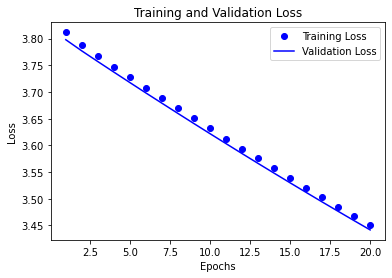

In [97]:
#training and validation loss
plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

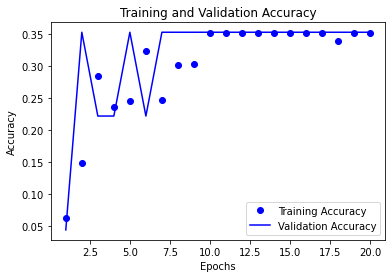

In [98]:
#training and validation accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [99]:
#Starts to overfit after 8 or 9 epochs
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 3.7862 - accuracy: 0.2630
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 3.6223 - accuracy: 0.3517
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 3.3763 - accuracy: 0.3517
Epoch 4/9
18/18 [==============================] - 0s 11ms/step - loss: 3.0742 - accuracy: 0.3517
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 2.7715 - accuracy: 0.3517
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 2.5474 - accuracy: 0.3517
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 2.4467 - accuracy: 0.3517
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 2.4218 - accuracy: 0.3517
Epoch 9/9
71/71 [==============================] - 1s 3ms/step - loss: 2.4215 - accuracy: 0.3620


In [100]:
results

[2.4215126037597656, 0.36197686195373535]

In [101]:
#accuracy of random baseline classifier
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19011576135351738

In [104]:
#generate predictions on new data

predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [105]:
#coefficients in the vector sum to 1 because they are apart of a probability distribution
np.sum(predictions[0])

1.0

In [106]:
#largest entry is the predicted class w/ highest probability
np.argmax(predictions[0])

3

In [111]:
#at position 3 is the predicted class w/ highest probability
predictions[0]

array([1.25343504e-08, 1.48741252e-04, 6.10158395e-08, 9.30524051e-01,
       6.85594603e-02, 7.99555255e-10, 1.98519494e-08, 5.56568958e-10,
       1.17124171e-06, 2.47853620e-07, 6.24218501e-07, 9.71554837e-05,
       1.84823250e-08, 3.04025070e-06, 6.83784052e-09, 3.61625352e-09,
       2.10516519e-04, 2.30852173e-08, 3.44927962e-08, 4.20865457e-04,
       3.32642667e-05, 3.21867304e-07, 3.19573612e-09, 7.23481453e-09,
       5.48644508e-08, 1.32599695e-07, 4.34762315e-09, 3.63445984e-09,
       1.91513188e-08, 8.31948910e-09, 2.44526159e-08, 8.05133737e-09,
       1.44375472e-08, 7.07127912e-09, 3.66189177e-08, 1.06076514e-09,
       6.68510136e-09, 6.29712771e-09, 1.77896080e-08, 1.87420990e-09,
       5.15972109e-09, 8.02222822e-09, 1.71371561e-09, 3.04091285e-09,
       2.55403276e-09, 2.16447238e-09], dtype=float32)

In [113]:
#alternativly labels could be cast as integers
y_train = np.array(train_labels)
y_test = np.array(test_labels)

#But instead of using categorical cross entropy as the loss function which expects a categorical encoding.
#Use sparse_categroical_cross entropy with integer labels

model.compile(optimizer="rmsprop", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

## Regression -- Boston Housing

In [114]:
#targets are median values of owner occupied homes, in thousands of dollars
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57344/57026 [==============================] - 0s 1us/step


In [115]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [116]:
#data prep - normalize features of the data so they are centered around 0 and have unit standard deviation
#Scale each feature independently because they have different ranges
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -= mean
test_data /= std

In [118]:
#Used mean absolute error which is the difference between the pred and target.
#an MAE of 0.5 means prediction was off by $500
#Because there is only about 400 points in the training data use a small model to avoid overfitting
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = "relu"),
        layers.Dense(64, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
    return model

In [119]:
#Use k-fold to evaluate the model while adjusting the parameters
k = 4 
num_val_samples = len(train_data) // k
num_epochs = 100 
all_scores = [] 
for i in range(k):
    print(f"Processing fold #{i}")
    #prepare validation data: data from partition #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]   
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    #prepare training data: data from all other partitions
    partial_train_data = np.concatenate(                                    
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()                                                   
    model.fit(partial_train_data, partial_train_targets,                    
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)     
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [120]:
all_scores

[2.0904228687286377, 2.329252004623413, 2.575040578842163, 2.3557307720184326]

In [121]:
np.mean(all_scores)

2.3376115560531616

In [126]:
#Rerun with 500 epochs
num_epochs = 500 
all_mae_histories = [] 
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]   
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                    
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()                                                   
    history = model.fit(partial_train_data, partial_train_targets,          
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [127]:
#Build the history of successive mean k-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

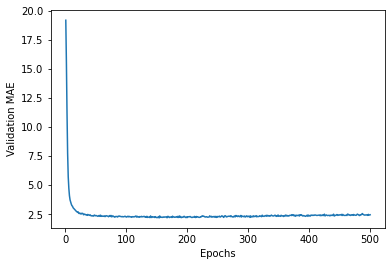

In [128]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

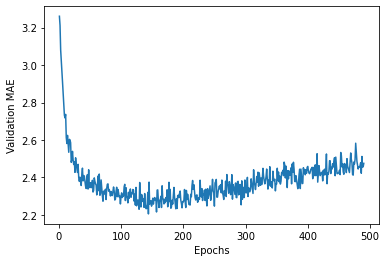

In [129]:
#Remove the first 10 points since they are on a different scale than most other data
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [130]:
#Final model using knowledge gained w/ best number of epochs
model = build_model()
model.fit(train_data, train_targets,
         epochs = 130, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.7112 - mae: 2.8809


In [131]:
test_mae_score

2.88088059425354

In [132]:
predictions = model.predict(test_data)
predictions[0]

array([8.606723], dtype=float32)